#Name: Santos Tristan Neal U.
#Section: CPE32S9
#Date: 05-04-2024

- 1.Load time series data: data.csvDownload data.csv
- 2.Visualize the time series
- 3.Fit an ARIMA Model (baseline model order = (1,1,1))
- 4.Improve the ARIMA Model
- 5.Print the model summary
- 6.Make a forecast (steps=10)
- 7.Plot the forecast
- 8.Perform a grid search

- 1.Load time series data: data.csvDownload data.csv


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Month
1965-01-01    319.32
1965-02-01    320.36
1965-03-01    320.82
1965-04-01    322.06
1965-05-01    322.17
Name: CO2 (ppm), dtype: float64


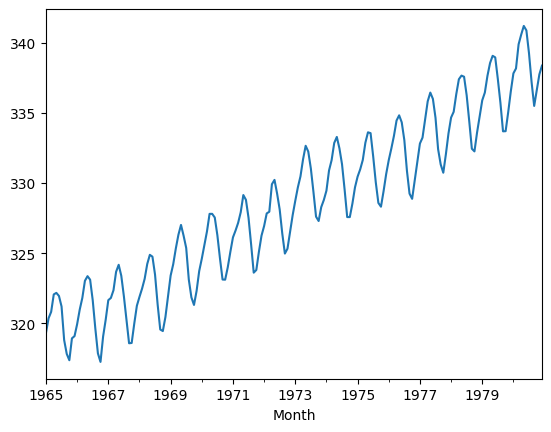

In [15]:
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot

def parser(x):
    return datetime.strptime(x, '%Y-%m')

# load dataset
data = read_csv('/content/drive/MyDrive/Colab Notebooks/Emtech2/csv/data.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)

# convert to Series
series = data.iloc[:, 0]

print(series.head())
series.plot()
pyplot.show()

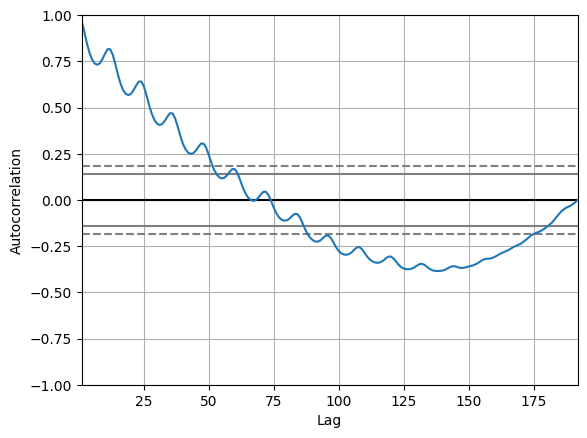

In [16]:
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

def parser(x):
    return datetime.strptime(x + '-01', '%Y-%m-%d')

# load dataset
series = read_csv('/content/drive/MyDrive/Colab Notebooks/Emtech2/csv/data.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)

autocorrelation_plot(series)
pyplot.show()

In [17]:
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA

# load dataset
series = read_csv('/content/drive/MyDrive/Colab Notebooks/Emtech2/csv/data.csv', header=0, index_col=0, parse_dates=True)

# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()

- 2.Visualize the time series


<Axes: xlabel='Month'>

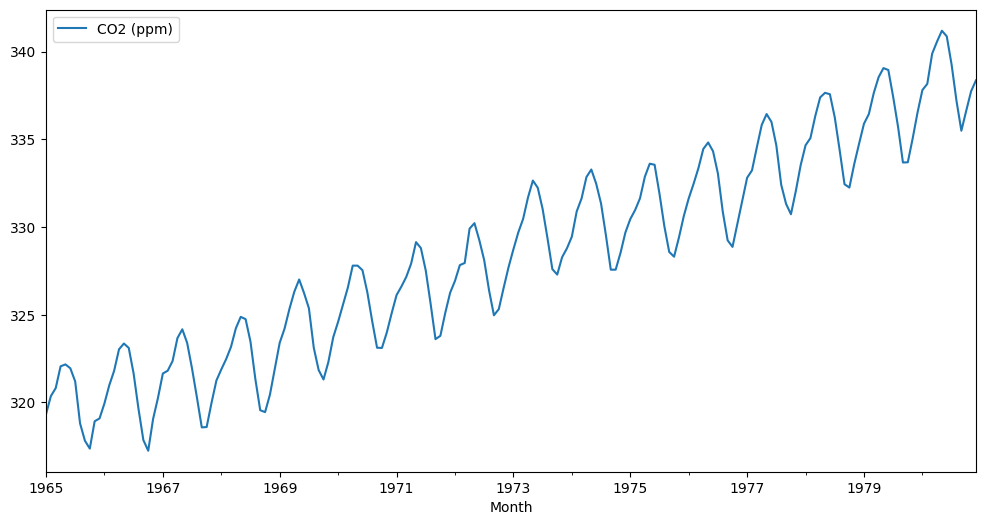

In [18]:
data.plot(figsize=(12,6))

- 3.Fit an ARIMA Model (baseline model order = (1,1,1))


In [19]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data, order=(1,1,1))
model_fit = model.fit()

- 4.Improve the ARIMA Model


In [20]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data, order=(1,2,3))
model_fit = model.fit()

- 5.Print the model summary


In [21]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              CO2 (ppm)   No. Observations:                  192
Model:                 ARIMA(1, 2, 3)   Log Likelihood                -215.841
Date:                Sat, 04 May 2024   AIC                            441.682
Time:                        13:27:42   BIC                            457.917
Sample:                    01-01-1965   HQIC                           448.259
                         - 12-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3825      0.140      2.724      0.006       0.107       0.658
ma.L1         -0.4704     22.759     -0.021      0.984     -45.077      44.136
ma.L2         -0.1176     11.997     -0.010      0.9

- 6.Make a forecast (steps=10)


In [22]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Splitting into train and test sets
train_size = int(len(data) * 0.75)
train_data, test_data = data[0:train_size], data[train_size:]

start = len(train_data)
end=len(train_data)+len(test_data)-1
model = ARIMA(train_data, order = (9,2,0))
results = model.fit()
predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
forecast = results.predict(len(data), len(data)+10, typ = 'levels')

In [23]:
print("Forecast (steps = 10)")
print(forecast)

Forecast (steps = 10)
1981-01-01    338.829450
1981-02-01    339.410077
1981-03-01    339.846441
1981-04-01    339.951027
1981-05-01    339.624439
1981-06-01    338.996781
1981-07-01    338.387871
1981-08-01    338.097810
1981-09-01    338.219246
1981-10-01    338.635268
1981-11-01    339.168786
Freq: MS, Name: predicted_mean, dtype: float64


In [24]:
print("MSE: ", mean_squared_error(test_data, predictions))
print("RMSE: ", sqrt(mean_squared_error(test_data, predictions)))

MSE:  1.1498843083979555
RMSE:  1.0723265866320557


- 7.Plot the forecast


In [25]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

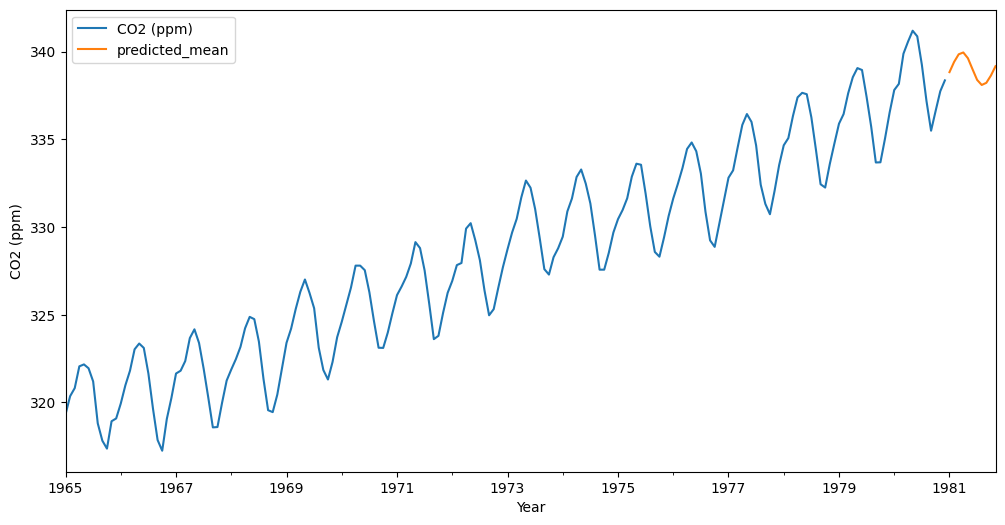

In [26]:
ylabel='CO2 (ppm)'
xlabel='Year'

ax = data.plot(legend=True,figsize=(12,6))
forecast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

- 8.Perform a grid search

In [27]:
def evaluate_arima_model(dataset, arima_order):
  train_size = int(len(data) * 0.75)
  train_data, test_data = data[0:train_size], data[train_size:]

  start = len(train_data)
  end=len(train_data)+len(test_data)-1

  model = ARIMA(train_data, order = arima_order)
  results = model.fit()
  forecast = results.predict(len(data), len(data)+10, typ = 'levels')
  predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
  mse = mean_squared_error(test_data, predictions)
  return mse

In [28]:
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(data, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA=%s MSE=%.3f' % (best_cfg, best_score))

In [29]:
import warnings
p_values = range(0,11)
d_values = range(0, 4)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(data.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=107.199
ARIMA(0, 0, 1) MSE=106.494
ARIMA(0, 0, 2) MSE=106.042
ARIMA(0, 0, 3) MSE=105.846
ARIMA(0, 1, 0) MSE=26.634
ARIMA(0, 1, 1) MSE=23.951
ARIMA(0, 1, 2) MSE=20.025
ARIMA(0, 1, 3) MSE=18.380
ARIMA(0, 2, 0) MSE=1059.451
ARIMA(0, 2, 1) MSE=942.369
ARIMA(0, 2, 2) MSE=998.307
ARIMA(0, 2, 3) MSE=6.025
ARIMA(0, 3, 0) MSE=1432.028
ARIMA(0, 3, 1) MSE=1128.208
ARIMA(0, 3, 2) MSE=945.481
ARIMA(0, 3, 3) MSE=1022.852
ARIMA(1, 0, 0) MSE=62.368
ARIMA(1, 0, 1) MSE=72.465
ARIMA(1, 0, 2) MSE=81.394
ARIMA(1, 0, 3) MSE=91.863
ARIMA(1, 1, 0) MSE=8.619
ARIMA(1, 1, 1) MSE=13.928
ARIMA(1, 1, 2) MSE=14.918
ARIMA(1, 1, 3) MSE=18.170
ARIMA(1, 2, 0) MSE=1065.125
ARIMA(1, 2, 1) MSE=1008.356
ARIMA(1, 2, 2) MSE=4.099
ARIMA(1, 2, 3) MSE=4.275
ARIMA(1, 3, 0) MSE=75819.084
ARIMA(1, 3, 1) MSE=1087.634
ARIMA(1, 3, 2) MSE=1026.289
ARIMA(1, 3, 3) MSE=1016.551
ARIMA(2, 0, 0) MSE=97.612
ARIMA(2, 0, 1) MSE=95.559
ARIMA(2, 0, 2) MSE=94.688
ARIMA(2, 0, 3) MSE=36.992
ARIMA(2, 1, 0) MSE=23.998
ARIMA(2, 1, 1)

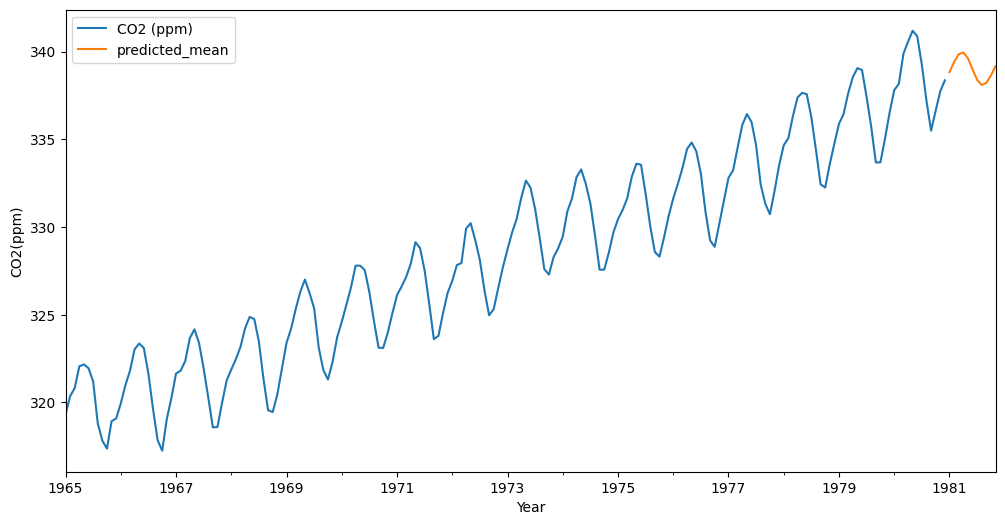

In [30]:
# Splitting into train and test sets
train_size = int(len(data) * 0.75)
train_data, test_data = data[0:train_size], data[train_size:]

start = len(train_data)
end=len(train_data)+len(test_data)-1
model = ARIMA(train_data, order = (9,2,0))
results = model.fit()
predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
forecast = results.predict(len(data), len(data)+10, typ = 'levels')

ylabel='CO2(ppm)'
xlabel='Year'

ax = data.plot(legend=True,figsize=(12,6))
forecast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

#Supplementary

do the same for this dataset - dataset_temperature.csv

- 1.Load time series data: data.csvDownload dataset_temperature.csv

Month
1907-02-01    46.0
1907-03-01    43.0
1907-04-01    55.0
1907-05-01    51.8
1907-06-01    57.5
Name: Mean monthly temperature, dtype: float64


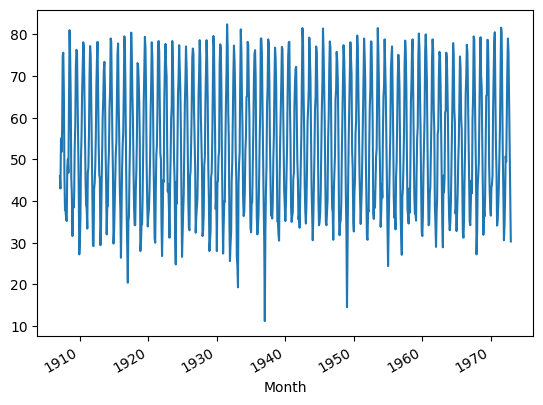

In [32]:
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
import pandas as pd
import numpy as np

def parser(x):
    if x == ' 1907 ? 1972':
        return np.nan
    try:
        return datetime.strptime(str(x), '%Y-%m')
    except ValueError:
        return pd.NaT

# load dataset
data = read_csv('/content/drive/MyDrive/Colab Notebooks/Emtech2/csv/dataset_temperature.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser, skiprows=[1], na_values=[' 1907 ? 1972'], dtype={'Month': 'str', 'Mean monthly temperature': 'float'})

# convert to Series
series = data.iloc[:, 0]

print(series.head())
series.plot()
pyplot.show()

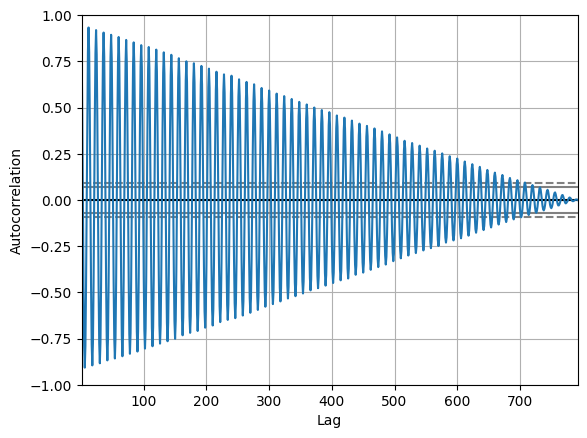

In [33]:
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
import pandas as pd
import numpy as np

def parser(x):
    try:
        return datetime.strptime(x, '%Y-%m-%d')
    except (ValueError, TypeError):
        return np.nan

# Load dataset
df = read_csv('/content/drive/MyDrive/Colab Notebooks/Emtech2/csv/dataset_temperature.csv')

# Convert 'Mean monthly temperature' column to numeric
df['Mean monthly temperature'] = pd.to_numeric(df['Mean monthly temperature'], errors='coerce')

# Remove rows with missing values
df.dropna(inplace=True)

# Extract the series to plot
series = df['Mean monthly temperature']

# Plot autocorrelation
autocorrelation_plot(series)
pyplot.show()

In [34]:
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Load dataset
series = read_csv('/content/drive/MyDrive/Colab Notebooks/Emtech2/csv/dataset_temperature.csv', header=0, index_col=0, parse_dates=True)

# Convert series to numeric format
series['Mean monthly temperature'] = pd.to_numeric(series['Mean monthly temperature'], errors='coerce')

# Remove rows with missing values
series.dropna(inplace=True)

# Fit model
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit()


- 2.Visualize the time series

<Axes: xlabel='Month'>

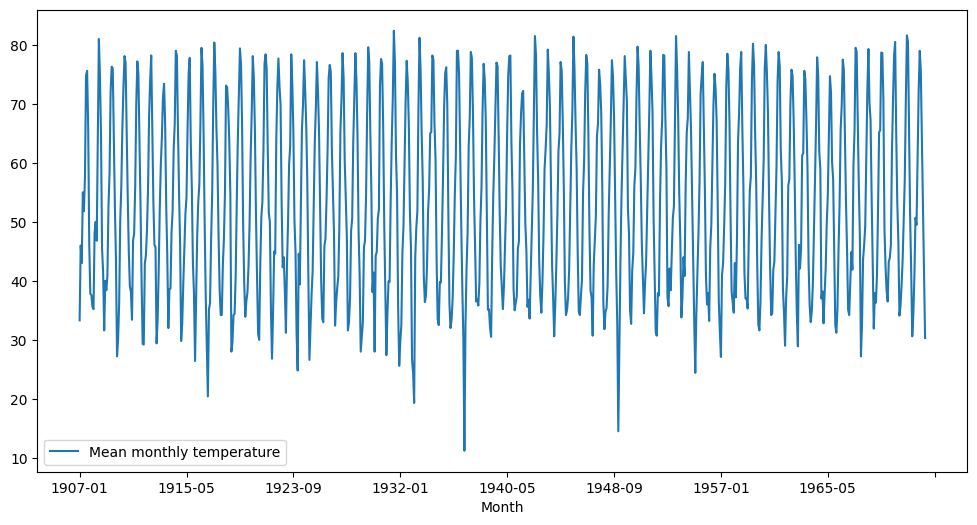

In [35]:
# Plot the dataset
series.plot(figsize=(12, 6))


- 3.Fit an ARIMA Model (baseline model order = (1,1,1))

In [36]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(series, order=(1, 1, 1))
model_fit = model.fit()


- 4.Improve the ARIMA Model

In [37]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(series, order=(2, 4, 6))
model_fit = model.fit()


- 5.Print the model summary

In [38]:
print(model_fit.summary())

                                  SARIMAX Results                                   
Dep. Variable:     Mean monthly temperature   No. Observations:                  792
Model:                       ARIMA(2, 4, 6)   Log Likelihood               -2850.230
Date:                      Sat, 04 May 2024   AIC                           5718.460
Time:                              13:32:21   BIC                           5760.486
Sample:                          01-01-1907   HQIC                          5734.616
                               - 12-01-1972                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9045      0.016   -117.984      0.000      -1.936      -1.873
ar.L2         -0.9961      0.015    -64.886      0.000      -1.026      -0.966
ma.L


- 6.Make a forecast (steps=10)

In [39]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Splitting into train and test sets
train_size = int(len(series) * 0.75)
train_data, test_data = series[0:train_size], series[train_size:]

start = len(train_data)
end = len(train_data) + len(test_data) - 1
model = ARIMA(train_data, order=(9, 2, 0))
results = model.fit()
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')
forecast = results.predict(len(series), len(series) + 10, typ='levels')

In [42]:
print("Forecast (steps = 10)")
print(forecast)

Forecast (steps = 10)
1973-01-01    113.284581
1973-02-01    113.551532
1973-03-01    113.772269
1973-04-01    113.970151
1973-05-01    114.173882
1973-06-01    114.409288
1973-07-01    114.692256
1973-08-01    115.024743
1973-09-01    115.394839
1973-10-01    115.780688
1973-11-01    116.156999
Freq: MS, Name: predicted_mean, dtype: float64


In [43]:
print("MSE: ", mean_squared_error(test_data, predictions))
print("RMSE: ", sqrt(mean_squared_error(test_data, predictions)))

MSE:  1360.2977048399682
RMSE:  36.88221393625887



- 7.Plot the forecast

In [40]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

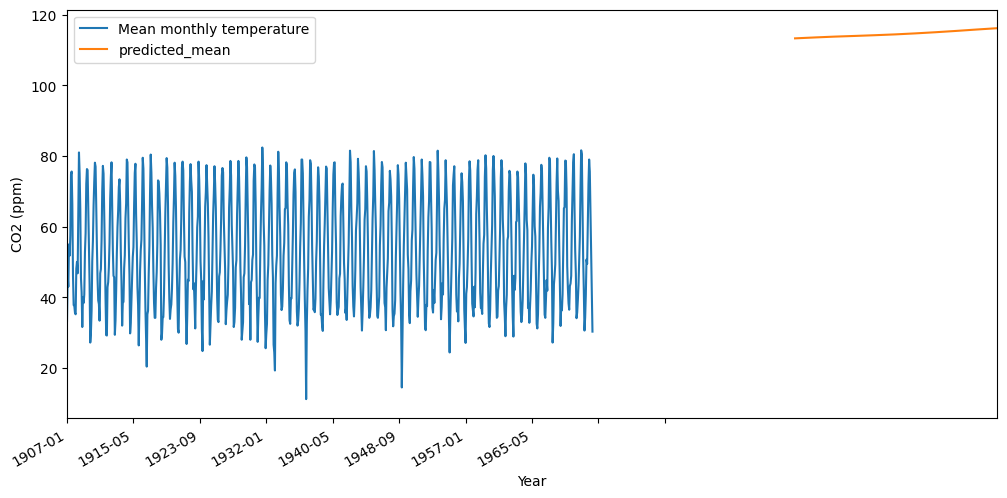

In [41]:
ylabel = 'CO2 (ppm)'
xlabel = 'Year'

ax = series.plot(legend=True, figsize=(12, 6))
forecast.plot(legend=True)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter)


- 8.Perform a grid search

In [12]:
def evaluate_arima_model(dataset, arima_order):
  train_size = int(len(data) * 0.75)
  train_data, test_data = data[0:train_size], data[train_size:]

  start = len(train_data)
  end=len(train_data)+len(test_data)-1

  model = ARIMA(train_data, order = arima_order)
  results = model.fit()
  forecast = results.predict(len(data), len(data)+10, typ = 'levels')
  predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
  mse = mean_squared_error(test_data, predictions)
  return mse

In [13]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

def evaluate_models(data, p_values, d_values, q_values):
    best_score, best_order = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    model = ARIMA(data, order=order)
                    model_fit = model.fit()
                    predictions = model_fit.predict()
                    mse = mean_squared_error(data, predictions)
                    if mse < best_score:
                        best_score, best_order = mse, order
                except:
                    continue
    print("Best ARIMA order:", best_order)
    print("Best MSE:", best_score)

In [14]:
import warnings
p_values = range(0, 11)
d_values = range(0, 4)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

Best ARIMA order: (10, 0, 3)
Best MSE: 16.957872514692493


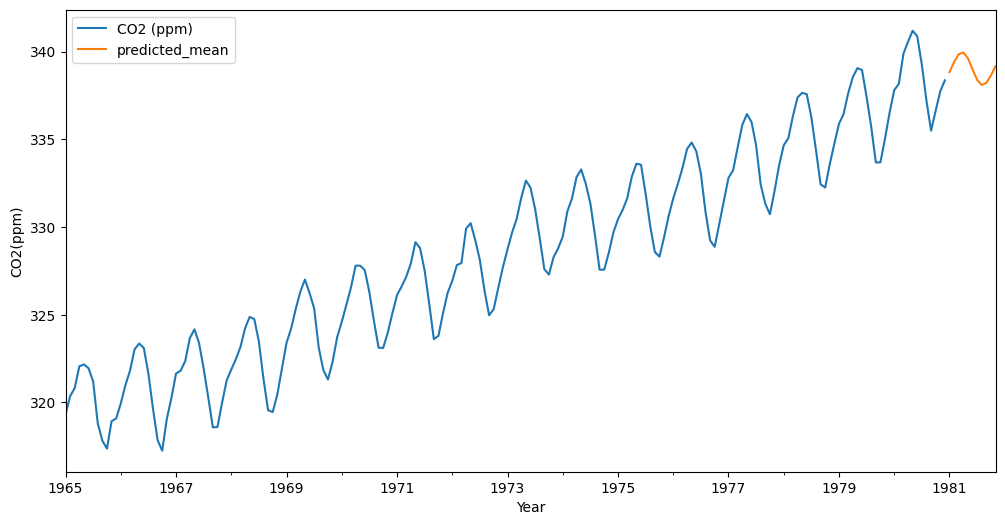

In [31]:
# Splitting into train and test sets
train_size = int(len(data) * 0.75)
train_data, test_data = data[0:train_size], data[train_size:]

start = len(train_data)
end=len(train_data)+len(test_data)-1
model = ARIMA(train_data, order = (9,2,0))
results = model.fit()
predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
forecast = results.predict(len(data), len(data)+10, typ = 'levels')

ylabel='CO2(ppm)'
xlabel='Year'

ax = data.plot(legend=True,figsize=(12,6))
forecast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

# Conclusion

In this exercise, we investigated the use of the AutoRegressive Integrated Moving Average, or ARIMA, model for forecasting and time series analysis. The datasets dataset_temperature.csv and data.csv were the two datasets we used. Applying an ARIMA model, improving its efficiency, and producing forecasts for next time steps were the goals.

Through this activity, students were given the chance to get practical knowledge using the ARIMA model for forecasting and time series analysis. We acquired understanding of how to make use of the ARIMA model's capability to identify trends, seasonality, and other patterns in time series data through using real-world datasets and going through the procedures of model fitting, optimizing, and evaluation. We managed to determine the best model orders through the grid search procedure, which improved the accuracy of our forecasts. All things considered, this exercise offered useful information about the strength and flexibility of the ARIMA model for time series analysis.